In [20]:
import numpy as np
import matplotlib.pyplot as plt 

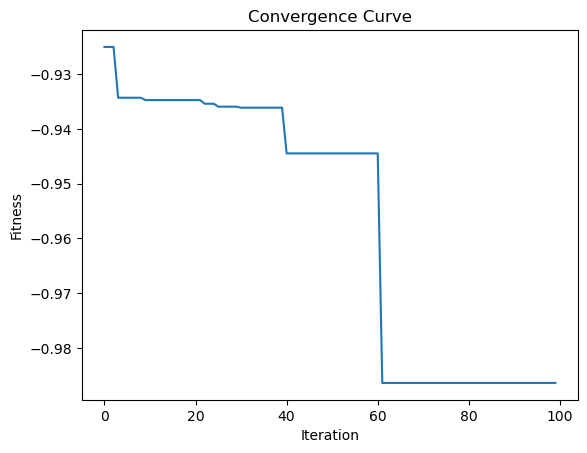

Best solution found: [-0.12759953  0.50002983]
Objective value at best solution: -0.9356579029377797


In [21]:
class drop_wave_wolf:
    
    def __init__(self, num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound, objective_function):
        self.num_wolves = num_wolves  # Number of grey wolves in the pack
        self.num_dimensions = num_dimensions  # Number of dimensions in the problem
        self.num_iterations = num_iterations  # Number of iterations or epochs
        self.lower_bound = lower_bound  # Lower bound of the search space
        self.upper_bound = upper_bound  # Upper bound of the search space
        self.objective_function = objective_function  # Objective function to be optimized
        self.best_objective_values = []
    
    
#intialize wolf 
    def initialize_wolves(self):
        return np.random.uniform(self.lower_bound, self.upper_bound, size=(self.num_wolves, self.num_dimensions))


#update alpha,beta,delta wolf  
    def update_alpha(self, iteration):
        a = 2 - iteration * (2 / self.num_iterations)  # Calculate value of 'a'
        return 2 * a * np.random.random_sample(self.num_dimensions) - a

    def update_beta(self, iteration):
        b = 1 - iteration * (1 / self.num_iterations)  # Calculate value of 'b'
        return 2 * b * np.random.random_sample(self.num_dimensions) - b

    def update_delta(self, iteration):
        d = iteration * (1 / self.num_iterations)  # Calculate value of 'd'
        return 2 * d * np.random.random_sample(self.num_dimensions) - d
    


#update wolf to get the best 
    def update_wolves(self, wolves, alpha, beta, delta):
        updated_wolves = np.zeros_like(wolves)
        for i in range(self.num_wolves):
            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A1 = 2 * r1 * alpha - alpha
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha - wolves[i])
            X1 = alpha - A1 * D_alpha

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A2 = 2 * r1 * beta - beta
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta - wolves[i])
            X2 = beta - A2 * D_beta

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A3 = 2 * r1 * delta - delta
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta - wolves[i])
            X3 = delta - A3 * D_delta

            updated_wolves[i] = (X1 + X2 + X3) / 3
        return updated_wolves
    

#optimization 
    def optimize(self):
        wolves = self.initialize_wolves()
        best_objective_value = float('inf')
        
        for iteration in range(self.num_iterations):

            alpha = self.update_alpha(iteration)
            beta = self.update_beta(iteration)
            delta = self.update_delta(iteration)
            wolves = self.update_wolves(wolves, alpha, beta, delta)
            objective_values = [self.objective_function(wolf) for wolf in wolves]
            min_objective_value = min(objective_values)
            if min_objective_value < best_objective_value:
                best_objective_value = min_objective_value
            self.best_objective_values.append(best_objective_value)
        plot=True
        if plot:
         plt.plot(self.best_objective_values)
         plt.title("Convergence Curve")
         plt.xlabel("Iteration")
         plt.ylabel("Fitness")
         plt.show()
        best_wolf = wolves[np.argmin(objective_values)]
        
        return best_wolf
    


def drop(xx):
    x1 = xx[0]
    x2 = xx[1]

    frac1 = 1 + np.cos(12 * np.sqrt(x1 ** 2 + x2 ** 2))
    frac2 = 0.5 * (x1 ** 2 + x2 ** 2) + 2

    y = -frac1 / frac2
    return y


# Initialize drop_wave_wolf
num_wolves = 10
num_dimensions = 2  #  for simplicity
num_iterations = 100
lower_bound = -5
upper_bound = 12

gwo = drop_wave_wolf(num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound, drop)

# Optimize the Ackley function
best_solution = gwo.optimize()
print("Best solution found:", best_solution)
print("Objective value at best solution:", drop(best_solution))  